# Simple linear regression using 1 Explanatory Variable

* **Task 1:** I will choose one Variable that I believe that it mostly affects the CPI index based on extensive Expalanatory Data Analysis.

* **Task 2:** I will deploy a simple linear regression model and evaluate the results.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("/Users/adel/Desktop/Issachar Technologies/Cpi-Project-Updated/CPI-Project 2/Cpi-Compiled-Data-1990.csv")

##  Data exploration

### Feature Explanation - Data extracted from - https://fred.stlouisfed.org/searchresults/?st=cpi&isTst=1
- Target: CPIAUCSL - (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers.
- Feature 1: CUSR0000SETG01 - Airline Fares in U.S. City Average
- Feature 2: CUSR0000SAF116 - Alcoholic Beverages in U.S. City Average
- Feature 3: CPIAPPSL - Apparel in U.S. City Average
- Feature 4: CUSR0000SAD - Durables in U.S. City Average 
- Feature 5: CUSR0000SEHF01 - Electricity in U.S. City Average
- Feature 6: CPIENGSL - Energy in U.S. City Average 
- Feature 7: CPIUFDSL - Food in U.S. City Average 
- Feature 8: CUSR0000SEHE - Fuel Oil & Other Fuels in U.S. City Average 
- Feature 9: CUSR0000SETB01 - Gasoline in U.S. City Average 
- Feature 10: CPIHOSSL - Housing in U.S. City Average 
- Feature 11: CPIMEDSL - Medical Care in U.S. City Average 
- Feature 12: CUSR0000SAM1 - Medical Care Commodities in U.S. City Average 
- Feature 13: CUSR0000SETA01 - New Vihicles in U.S. City Average 
- Feature 14: CUUR0000SA0R - Purchasing Power in U.S. City Average 
- Feature 15: CUSR0000SEHA - Rent in U.S. City Average
- Feature 16: CUSR0000SAH1 - Shelter in U.S. City Average
- Feature 17: CPITRNSL - Transportation in U.S. City Average
- Feature 18: CUSR0000SETA02 - Used Cars & Trucks in U.S. City Average
    
Data Range: 1990-01-01 - 2022-09-01

In [3]:
#create a data dictionary to change the names of the column

colmn_dict = {"CPIAUCSL" : "CPI",
             "CUSR0000SETG01": "Airline_Fares",
             "CUSR0000SAF116": "Alcoholic_Beverages",
             "CPIAPPSL": "Apparel",
             "CUSR0000SAD": "Durables",
             "CUSR0000SEHF01":" Electricity",
             "CPIENGSL": "Energy",
             "CPIUFDSL": "Food",
             "CUSR0000SEHE":"Fuel_Oil",
             "CUSR0000SETB01":"Gasoline",
             "CPIHOSSL":"Housing",
             "CPIMEDSL":"Medical_Care",
             "CUSR0000SAM1":"Medical_Care_Commodities",
             "CUSR0000SETA01": "New_Vehicles",
             "CUUR0000SA0R": "Purchasing_Power",
             "CUSR0000SEHA": "Rent",
             "CUSR0000SAH1": "Shelter",
             "CPITRNSL":"Transportation",
             "CUSR0000SETA02":"Used_Cars_Trucks"}



In [4]:
#Rename the column names
data = data.rename(columns = colmn_dict)
data

DATE      CPI  Airline_Fares  Alcoholic_Beverages  Apparel  \
0    1990-01-01  127.500        134.800              126.700  119.900   
1    1990-02-01  128.000        138.200              127.000  122.000   
2    1990-03-01  128.600        141.000              127.600  123.800   
3    1990-04-01  128.900        144.100              127.900  124.100   
4    1990-05-01  129.100        145.900              128.600  124.000   
..          ...      ...            ...                  ...      ...   
388  2022-05-01  291.474        336.022              272.413  126.927   
389  2022-06-01  295.328        329.906              273.553  127.929   
390  2022-07-01  295.271        304.071              274.889  127.818   
391  2022-08-01  295.620        290.010              275.861  128.091   
392  2022-09-01  296.761        292.434              275.760  127.722   

     Durables   Electricity   Energy     Food  Fuel_Oil  Gasoline  Housing  \
0     113.300       116.000   98.900  129.700   110.600    92.900  126.100   
1     113.400       117.200   98.200  130.800    92.800    93.000  126.200   
2     113.300       117.100   97.600  131.000    89.800    92.300  126.800   
3     113.200       117.800   97.500  130.800    88.400    92.800  127.100   
4     113.200       117.500   96.700  131.100    87.500    91.700  127.300   
..        ...           ...      ...      ...       ...       ...      ...   
388   127.541       248.505  308.839  301.879   508.909   372.063  297.881   
389   128.476       252.804  332.087  304.867   505.445   413.606  300.290   
390   128.864       256.780  316.955  308.220   464.597   381.710  301.639   
391   129.490       260.643  301.045  310.664   453.418   341.383  304.109   
392   129.338       261.777  294.705  313.101   440.818   324.646  306.323   

     Medical_Care  Medical_Care_Commodities  New_Vehicles  Purchasing_Power  \
0         156.000                   157.300       121.300              78.5   
1         157.100                   158.700       121.200              78.2   
2         158.300                   159.700       120.900              77.7   
3         159.600                   160.900       120.800              77.6   
4         160.800                   161.800       120.900              77.4   
..            ...                       ...           ...               ...   
388       543.220                   386.273       171.254              34.2   
389       546.861                   387.787       172.369              33.7   
390       549.282                   390.077       173.432              33.8   
391       553.006                   391.032       174.891              33.8   
392       557.426                   390.677       176.058              33.7   

        Rent  Shelter  Transportation  Used_Cars_Trucks  
0    135.800  136.300         117.000           119.200  
1    136.100  136.600         117.200           118.700  
2    136.700  137.600         117.300           118.500  
3    137.200  138.200         117.700           118.200  
4    137.600  138.600         117.500           117.600  
..       ...      ...             ...               ...  
388  365.365  350.418         270.297           207.518  
389  368.203  352.550         280.691           210.863  
390  370.789  354.449         274.821           209.998  
391  373.525  356.894         268.586           209.782  
392  376.679  359.567         267.043           207.532  

[393 rows x 20 columns]

### Explore the data size

In [5]:
data.shape

(393, 20)

The dataset contains: 393 rows and 20 columns

### Explore the independant variables


In [6]:
columns_to_describe = data.columns[data.columns != 'CPI']  # Exclude column 'CPIAUCSL' the depandant variable
description = data[columns_to_describe].describe()
description

Airline_Fares  Alcoholic_Beverages     Apparel    Durables  \
count     393.000000           393.000000  393.000000  393.000000   
mean      238.399369           201.309555  125.691906  116.302552   
std        47.119050            39.927305    5.041742    7.775405   
min       134.800000           126.700000  114.389000  103.428000   
25%       201.841000           164.900000  120.500000  110.720000   
50%       239.100000           200.600000  125.843000  114.700000   
75%       274.246000           236.853000  130.400000  124.200000   
max       336.022000           275.861000  135.100000  129.700000   

        Electricity      Energy        Food    Fuel_Oil    Gasoline  \
count    393.000000  393.000000  393.000000  393.000000  393.000000   
mean     167.905405  171.259359  200.573812  203.875186  184.599746   
std       38.492435   57.552504   46.108228   99.715001   78.483103   
min      116.000000   96.700000  129.700000   82.900000   85.100000   
25%      129.300000  110.100000  159.700000   98.300000  104.400000   
50%      167.900000  183.500000  194.100000  225.164000  180.800000   
75%      206.088000  216.710000  243.235000  280.850000  240.407000   
max      261.777000  332.087000  313.101000  508.909000  413.606000   

          Housing  Medical_Care  Medical_Care_Commodities  New_Vehicles  \
count  393.000000    393.000000                 393.00000    393.000000   
mean   200.380761    341.380402                 283.85943    141.261249   
std     45.682776    111.694236                  69.13051      8.338731   
min    126.100000    156.000000                 157.30000    120.800000   
25%    159.200000    239.400000                 218.30000    137.300000   
50%    202.300000    335.000000                 285.90000    142.300000   
75%    233.695000    435.864000                 344.14200    146.099000   
max    306.323000    557.426000                 391.03200    176.058000   

       Purchasing_Power        Rent     Shelter  Transportation  \
count        393.000000  393.000000  393.000000      393.000000   
mean          52.355471  230.359458  231.081402      175.499270   
std           11.524731   65.253775   57.972697       35.534301   
min           33.700000  135.800000  136.300000      117.000000   
25%           42.300000  170.300000  180.300000      143.500000   
50%           49.600000  223.700000  231.000000      176.000000   
75%           61.700000  276.663000  270.891000      205.698000   
max           78.500000  376.679000  359.567000      280.691000   

       Used_Cars_Trucks  
count        393.000000  
mean         145.103952  
std           16.627765  
min          115.400000  
25%          137.544000  
50%          144.850000  
75%          151.800000  
max          213.173000

### Explore the dependant variable

**Check for Missing values in the depandant variable**

In [7]:
data['CPI'].isna().mean()

0.0

**Check for Missing values in the indepandant variables**

In [8]:
data[columns_to_describe].isna().mean()

DATE                        0.0
Airline_Fares               0.0
Alcoholic_Beverages         0.0
Apparel                     0.0
Durables                    0.0
 Electricity                0.0
Energy                      0.0
Food                        0.0
Fuel_Oil                    0.0
Gasoline                    0.0
Housing                     0.0
Medical_Care                0.0
Medical_Care_Commodities    0.0
New_Vehicles                0.0
Purchasing_Power            0.0
Rent                        0.0
Shelter                     0.0
Transportation              0.0
Used_Cars_Trucks            0.0
dtype: float64

The data I have contains 0 missing values 

### Visualise the distribution of dependant variable

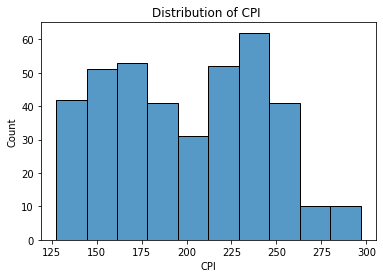

In [9]:
fig = sns.histplot(data['CPI'])

fig.set_xlabel("CPI")
fig.set_title("Distribution of CPI ")

plt.savefig('Distribution of CPI.pdf')
plt.show()

##  Building the Model

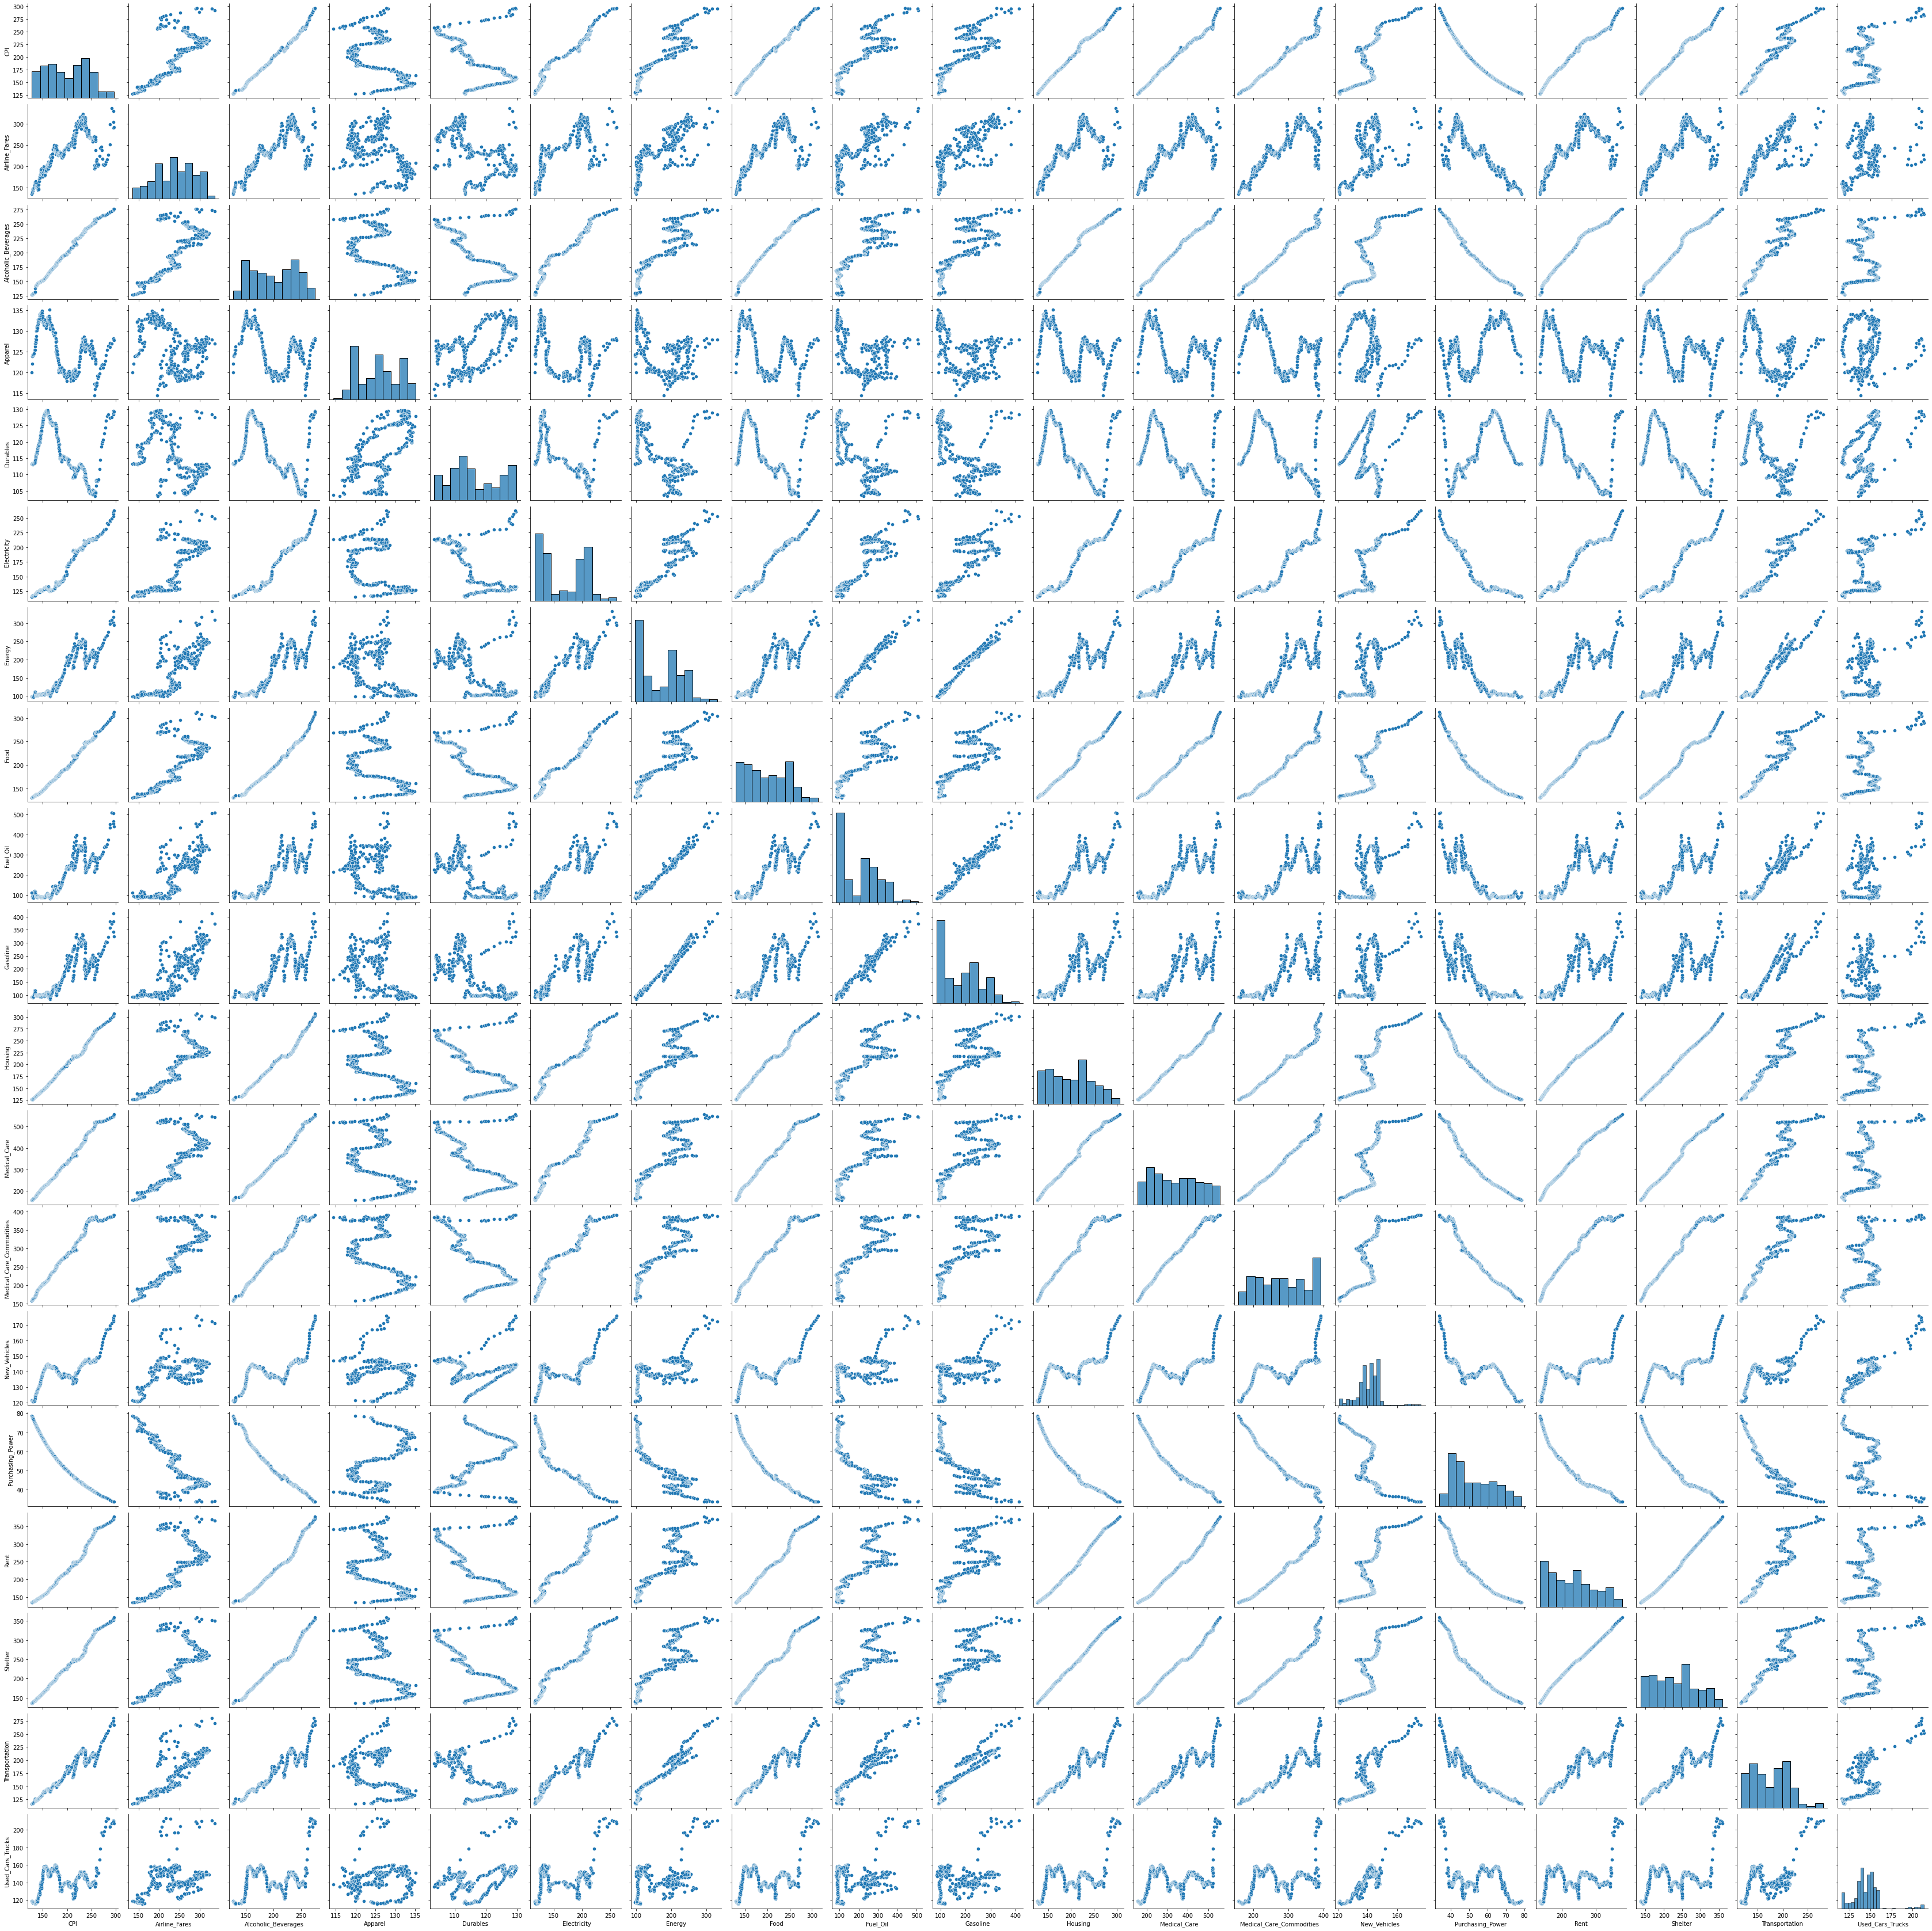

In [10]:
sns.pairplot(data)

Feature 2: CUSR0000SAF116 - Alcoholic Beverages in U.S. City Average and CPI have a linear relationship

Alcoholic Beverages clearly has the strongest linear relationship with CPI. You could draw a straight line through the scatterplot of `Alcoholic Beverages` and `CPI` that confidently estimates `CPI` using `Alcoholic Beverages`.

### fit the model

In [11]:
#define the ols formula
ols_formula = "CPI ~ Alcoholic_Beverages"

#fit the model
model = ols(formula = ols_formula, data = data)



In [12]:
    model = model.fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.916e+04
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        12:07:06   Log-Likelihood:                -1078.4
No. Observations:                 393   AIC:                             2161.
Df Residuals:                     391   BIC:                             2169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -12.8654      0.979    -13.137      0.000     -14.791     -10.940
Alcoholic_Beverages     1.0580      0.005    221.720      0.000       1.049       1.067
==============================================================================
Omnibus:                      172.395   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.205
Skew:                           1.854   Prob(JB):                    4.40e-187
Kurtosis:                       9.218   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

## 1. Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

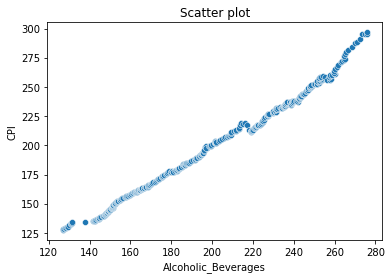

In [14]:
sns.scatterplot(x='Alcoholic_Beverages', y='CPI', data = data)

plt.title("Scatter plot")
plt.xlabel("Alcoholic_Beverages")
plt.ylabel("CPI")

plt.savefig('Linearity assumption.pdf')
plt.show()

**Result:** Linearity Assumption is met

## 2. Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals


In [15]:
#get the residuals

residuals = model.resid
residuals

0       6.311780
1       6.494368
2       6.459544
3       6.442132
4       5.901504
         ...    
388    16.115600
389    18.763435
390    17.292893
391    16.613478
392    17.861340
Length: 393, dtype: float64

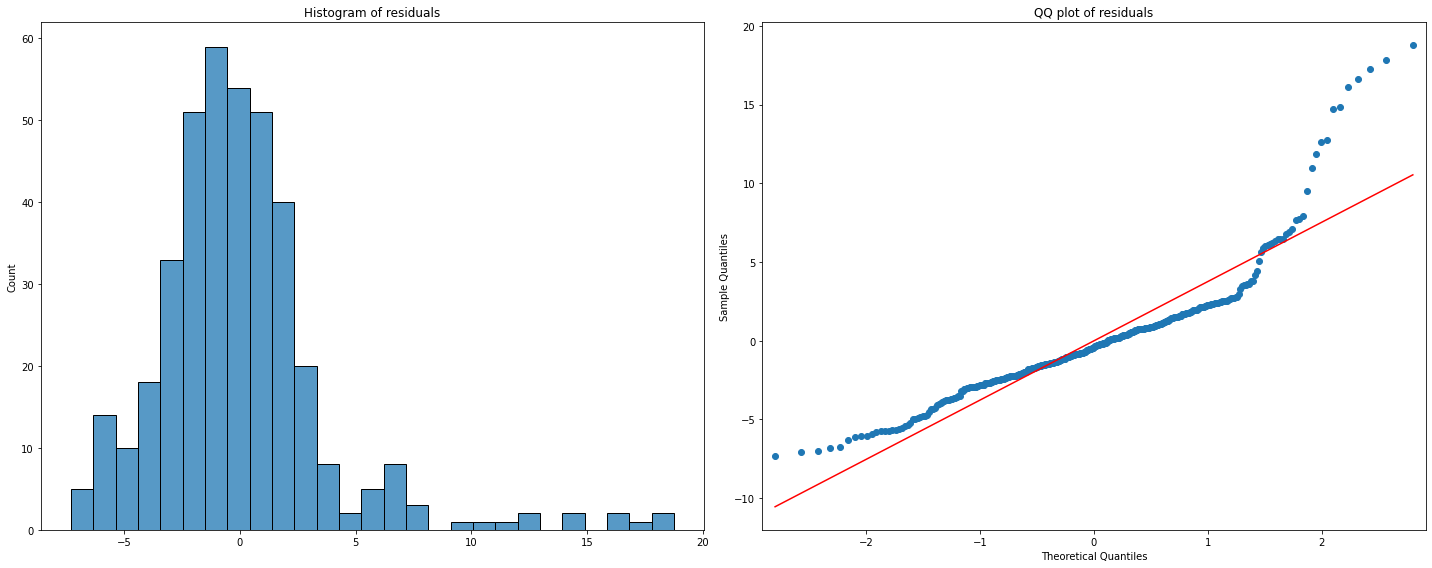

In [16]:
# Create a figure and subplots grid using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 rows, 2 column

# Plot 1: Histogram plot using Seaborn in the first subplot (axs[0])
sns.histplot(x=residuals, data=data, ax=axs[0])
axs[0].set_title('Histogram of residuals')

# Plot 2: QQ plot using Seaborn in the second subplot (axs[1])
sm.qqplot(residuals, ax=axs[1],line = 's')
axs[1].set_title('QQ plot of residuals')

# Adjust layout and display the figure
plt.tight_layout()

plt.savefig('Normality of residuals assumption.pdf')
plt.show()

The histogram of residuals exhibits a normal distribution. QQ plot emphasizes on that as well.

## 3. Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

In [17]:
fitted_values = model.fittedvalues
fitted_values

0      121.188220
1      121.505632
2      122.140456
3      122.457868
4      123.198496
          ...    
388    275.358400
389    276.564565
390    277.978107
391    279.006522
392    278.899660
Length: 393, dtype: float64

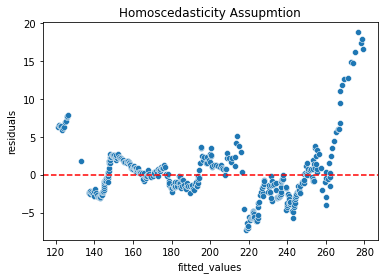

In [18]:
sns.scatterplot(x=fitted_values, y=residuals)

# Set the x-axis label.
plt.xlabel("fitted_values")
# Set the y-axis label.
plt.ylabel("residuals")
# Set the title.
plt.title("Homoscedasticity Assupmtion")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0, color='red', linestyle='--')
 
plt.savefig("Homoscedasticity assupmtion.pdf")
plt.show()

**I noticed that this assumption does not fully hold!**

## Additional examination: Logarithmic Transformation of dependant variable

In [19]:
data["CPI"].dtype

dtype('float64')

In [20]:
import numpy as np

In [21]:
transformed_data_CPI = np.log(data["CPI"])
transformed_data_CPI

0      4.848116
1      4.852030
2      4.856707
3      4.859037
4      4.860587
         ...   
388    5.674951
389    5.688087
390    5.687894
391    5.689075
392    5.692927
Name: CPI, Length: 393, dtype: float64

In [22]:
#define the ols formula
ols_formula = "transformed_data_CPI ~ Alcoholic_Beverages"

#fit the model
model = ols(formula = ols_formula, data = data)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     transformed_data_CPI   R-squared:                       0.992
Model:                              OLS   Adj. R-squared:                  0.992
Method:                   Least Squares   F-statistic:                 4.851e+04
Date:                  Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                          12:07:07   Log-Likelihood:                 992.56
No. Observations:                   393   AIC:                            -1981.
Df Residuals:                       391   BIC:                            -1973.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1872      0.005    830.997      0.000       4.177       4.197
Alcoholic_Beverages     0.0054   2.46e-05    220.254      0.000       0.005       0.005
==============================================================================
Omnibus:                        6.783   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.969
Skew:                          -0.317   Prob(JB):                       0.0307
Kurtosis:                       2.847   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

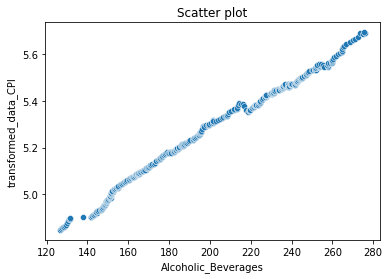

In [23]:
sns.scatterplot(x='Alcoholic_Beverages', y=transformed_data_CPI, data = data)

plt.title("Scatter plot")
plt.xlabel("Alcoholic_Beverages")
plt.ylabel("transformed_data_CPI")

plt.show()

In [24]:
#get the residuals

residuals = model.resid
residuals

0     -0.024316
1     -0.022024
2     -0.020593
3     -0.019885
4     -0.022120
         ...   
388    0.014513
389    0.021484
390    0.014066
391    0.009991
392    0.014389
Length: 393, dtype: float64

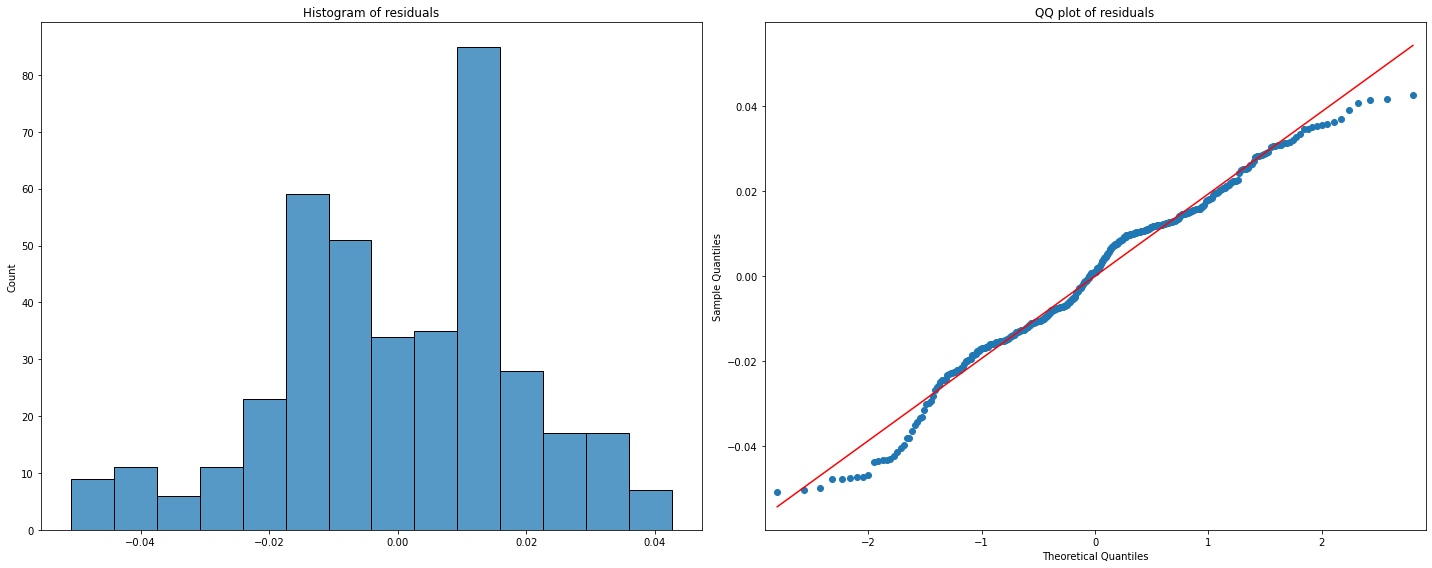

In [25]:
# Create a figure and subplots grid using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 rows, 2 column

# Plot 1: Histogram plot using Seaborn in the first subplot (axs[0])
sns.histplot(x=residuals, data=data, ax=axs[0])
axs[0].set_title('Histogram of residuals')

# Plot 2: QQ plot using Seaborn in the second subplot (axs[1])
sm.qqplot(residuals, ax=axs[1],line = 's')
axs[1].set_title('QQ plot of residuals')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

In [26]:
fitted_values = model.fittedvalues
fitted_values

0      4.872432
1      4.874055
2      4.877300
3      4.878922
4      4.882707
         ...   
388    5.660437
389    5.666602
390    5.673827
391    5.679084
392    5.678538
Length: 393, dtype: float64

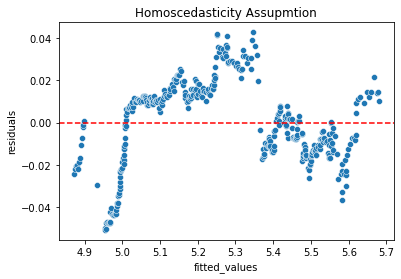

In [27]:
sns.scatterplot(x=fitted_values, y=residuals)

# Set the x-axis label.
plt.xlabel("fitted_values")
# Set the y-axis label.
plt.ylabel("residuals")
# Set the title.
plt.title("Homoscedasticity Assupmtion")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0, color='red', linestyle='--')
 

plt.show()

Even after logarithmic transformation, the assumption is still not met.

**Options to consider:**

1-  Weighted Least Squares (WLS)

2-  Use Robust Standard Errors

3-  Use Generalized Least Squares (GLS)

4-  Non-Parametric Methods

# Multiple linear regression using at least two or more Explanatory Variables

In [28]:
data.head(5)

DATE    CPI  Airline_Fares  Alcoholic_Beverages  Apparel  Durables  \
0  1990-01-01  127.5          134.8                126.7    119.9     113.3   
1  1990-02-01  128.0          138.2                127.0    122.0     113.4   
2  1990-03-01  128.6          141.0                127.6    123.8     113.3   
3  1990-04-01  128.9          144.1                127.9    124.1     113.2   
4  1990-05-01  129.1          145.9                128.6    124.0     113.2   

    Electricity  Energy   Food  Fuel_Oil  Gasoline  Housing  Medical_Care  \
0         116.0    98.9  129.7     110.6      92.9    126.1         156.0   
1         117.2    98.2  130.8      92.8      93.0    126.2         157.1   
2         117.1    97.6  131.0      89.8      92.3    126.8         158.3   
3         117.8    97.5  130.8      88.4      92.8    127.1         159.6   
4         117.5    96.7  131.1      87.5      91.7    127.3         160.8   

   Medical_Care_Commodities  New_Vehicles  Purchasing_Power   Rent  Shelter  \
0                     157.3         121.3              78.5  135.8    136.3   
1                     158.7         121.2              78.2  136.1    136.6   
2                     159.7         120.9              77.7  136.7    137.6   
3                     160.9         120.8              77.6  137.2    138.2   
4                     161.8         120.9              77.4  137.6    138.6   

   Transportation  Used_Cars_Trucks  
0           117.0             119.2  
1           117.2             118.7  
2           117.3             118.5  
3           117.7             118.2  
4           117.5             117.6

In [29]:
# Calculate the variance inflation factor (optional).

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.iloc[:,2:]
X


#Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data["VIF"] = round(vif_data["VIF"],2)

vif_data

Feature         VIF
0              Airline_Fares      553.05
1        Alcoholic_Beverages    25054.19
2                    Apparel     6777.00
3                   Durables    63216.45
4                Electricity     3837.69
5                     Energy    95038.52
6                       Food    14698.56
7                   Fuel_Oil      698.83
8                   Gasoline    22344.94
9                    Housing  1752375.15
10              Medical_Care    18639.05
11  Medical_Care_Commodities    13471.76
12              New_Vehicles    39286.09
13          Purchasing_Power     1854.27
14                      Rent    84347.73
15                   Shelter  1019613.85
16            Transportation    48349.28
17          Used_Cars_Trucks     3674.96

* VIF = 1: No multicollinearity. The variance of the regression coefficient of the variable is not inflated at all.

* VIF > 1: Indicates multicollinearity might be present. Typically, a VIF greater than 5 or 10 is considered high, suggesting significant multicollinearity.

* VIF > 5: Moderate multicollinearity.

* VIF > 10: High multicollinearity. The variance of the regression coefficient of the variable is significantly inflated by multicollinearity.

All features presents a large value for VIF which represents high multicollinearity

**However, I am going to proceed by selecting the two variables that has the lowest VIF and apply Multiple linear regression on these two explanatory variables**

In [30]:
sorted_vif_data = vif_data.sort_values(by='VIF',ascending=True)
sorted_vif_data.iloc[:2,]

Feature     VIF
0  Airline_Fares  553.05
7       Fuel_Oil  698.83

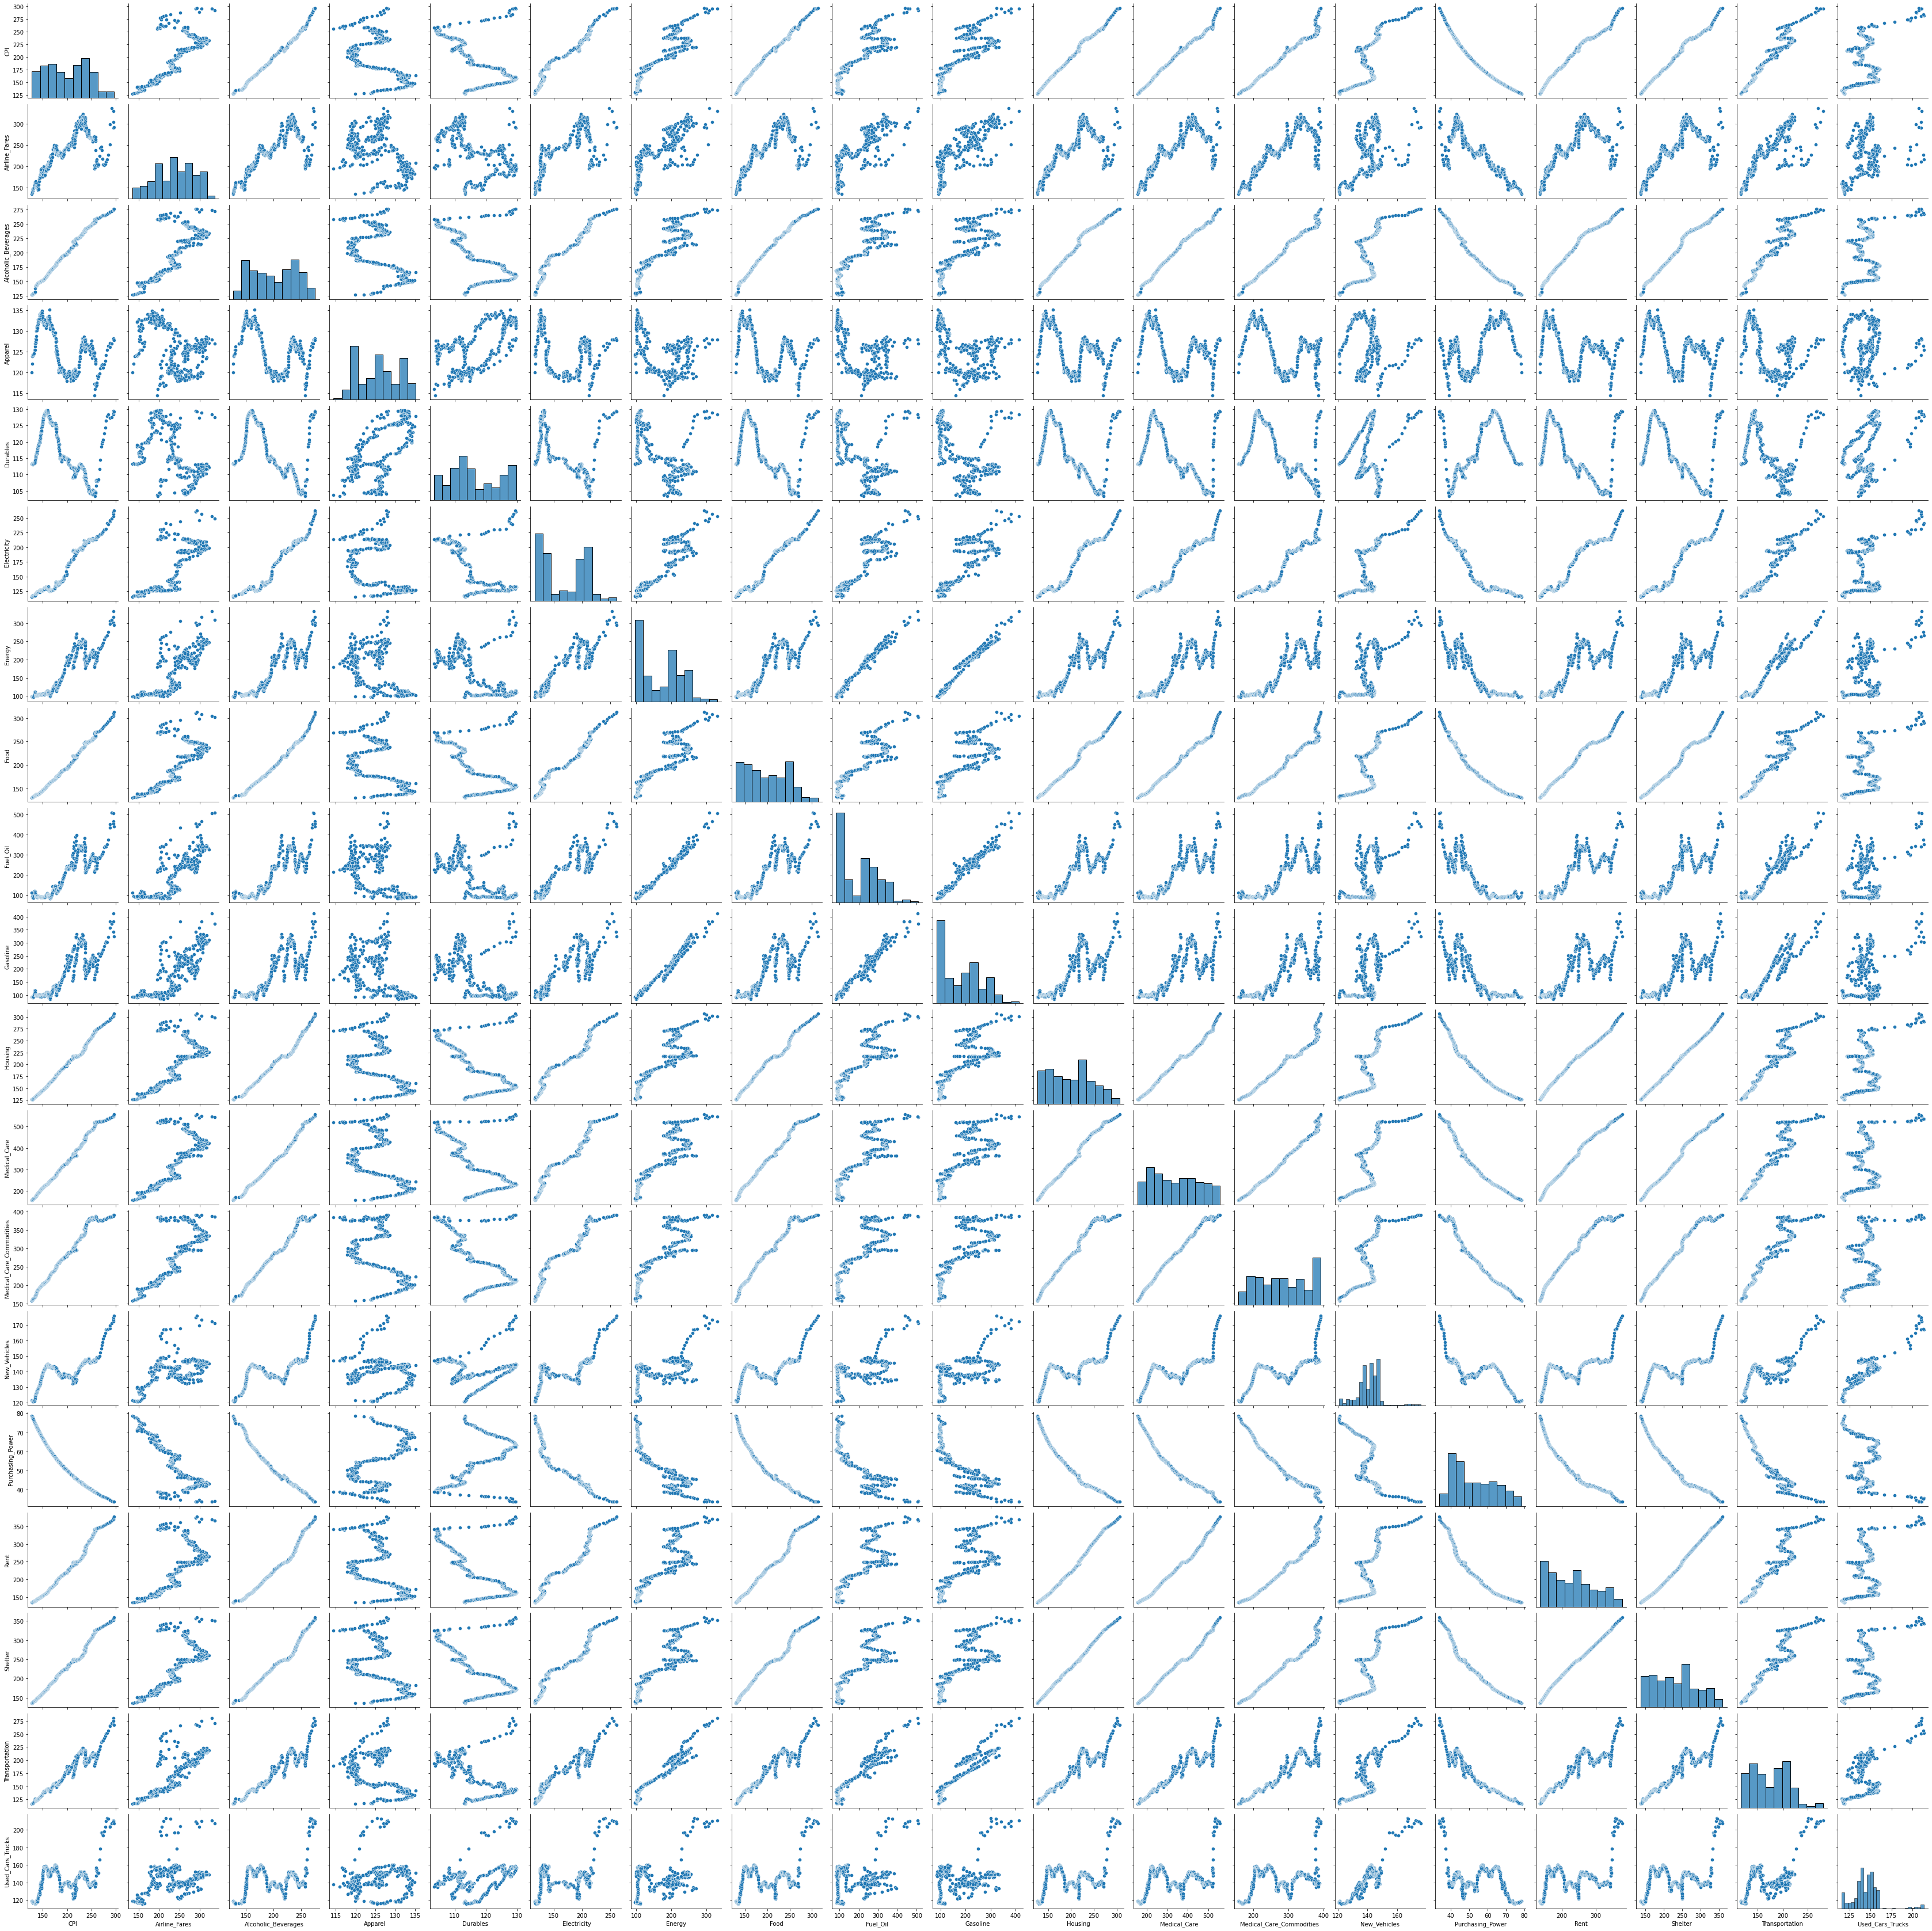

In [31]:
sns.pairplot(data)

## Build the model

In [32]:
# define the ols formula
ols_formula = "CPI ~ Airline_Fares + Fuel_Oil"

OLS = ols(formula = ols_formula, data=data)

model = OLS.fit()

In [33]:
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     743.9
Date:                Sat, 04 May 2024   Prob (F-statistic):          7.95e-134
Time:                        12:08:12   Log-Likelihood:                -1721.1
No. Observations:                 393   AIC:                             3448.
Df Residuals:                     390   BIC:                             3460.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       111.0416      6.290     17.654      0.000      98.675     123.408
Airline_Fares     0.0757      0.037      2.041      0.042       0.003       0.149
Fuel_Oil          0.3484      0.018     19.878      0.000       0.314       0.383
==============================================================================
Omnibus:                       16.933   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.909
Skew:                           0.509   Prob(JB):                     0.000129
Kurtosis:                       3.243   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for the assumptions

#### Linearity

<function matplotlib.pyplot.show(close=None, block=None)>

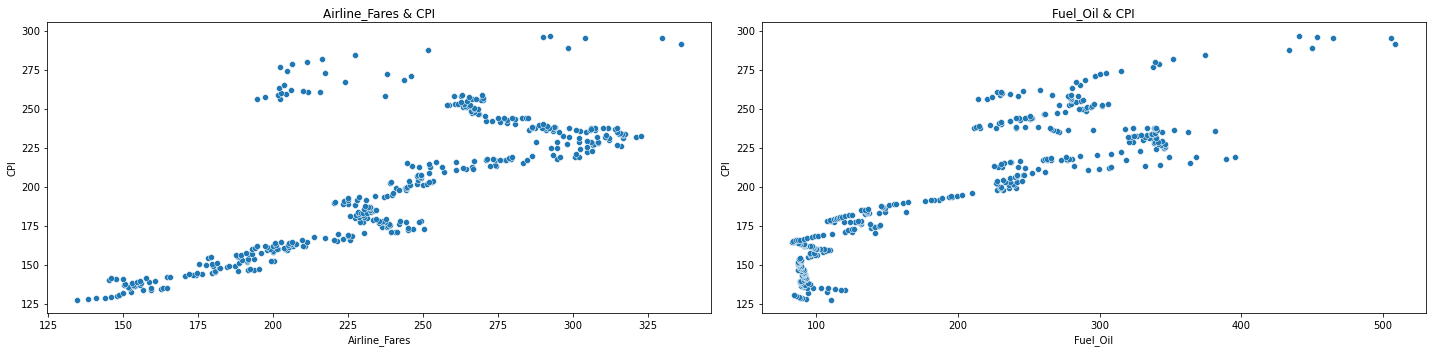

In [34]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

#Create scatter plot for the first feature CUSR0000SETG01

sns.scatterplot(x=data["Airline_Fares"],y=data['CPI'], ax=axes[0])
axes[0].set_title("Airline_Fares & CPI")


#Create scatter plot for the first feature CUSR0000SEHE

sns.scatterplot(x=data["Fuel_Oil"],y=data['CPI'], ax=axes[1])
axes[1].set_title("Fuel_Oil & CPI")

plt.tight_layout()
plt.show


CUSR0000SETG01 and CPI seems to have a clear linear relationship. CUSR0000SEHE and CPI also seems to exhibit a linear relationship.

**Assumption is met**

#### Normality of residuals

In [35]:
residuals = model.resid
residuals

0     -32.284299
1     -25.839864
2     -24.406624
3     -23.853574
4     -23.476296
         ...    
388   -22.326473
389   -16.802425
390    -0.670842
391     4.637888
392     9.985439
Length: 393, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

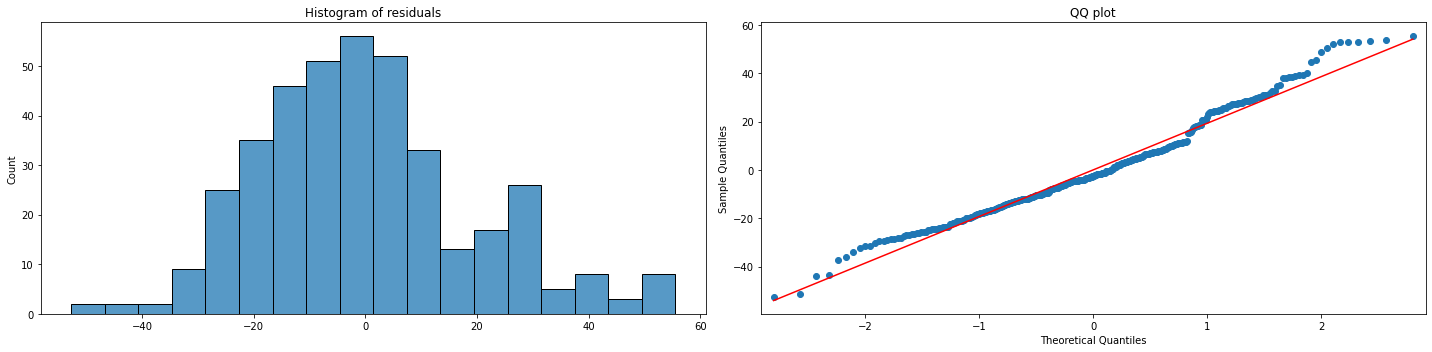

In [36]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

#Create histogram plot for the residuals

sns.histplot(residuals, ax=axes[0])
axes[0].set_title("Histogram of residuals")


#Create a qqplot for the residuals

sm.qqplot(residuals,line = 's', ax=axes[1])
axes[1].set_title("QQ plot")

plt.tight_layout()
plt.show


The residuals follow a normal distribution.

**Assumption is met**


#### Homoscedasticity

/Users/adel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


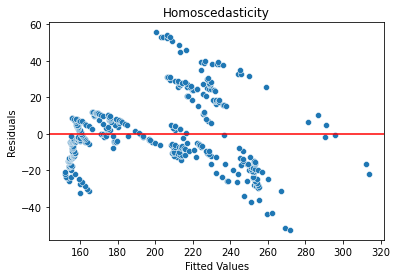

In [37]:
fitted_values = model.fittedvalues

fig = sns.scatterplot(fitted_values, residuals)

fig.set_title("Homoscedasticity")
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.axhline(0, color = 'r')

plt.show()

## Results and evaluation


In [38]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     743.9
Date:                Sat, 04 May 2024   Prob (F-statistic):          7.95e-134
Time:                        12:08:12   Log-Likelihood:                -1721.1
No. Observations:                 393   AIC:                             3448.
Df Residuals:                     390   BIC:                             3460.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       111.0416      6.290     17.654      0.000      98.675     123.408
Airline_Fares     0.0757      0.037      2.041      0.042       0.003       0.149
Fuel_Oil          0.3484      0.018     19.878      0.000       0.314       0.383
==============================================================================
Omnibus:                       16.933   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.909
Skew:                           0.509   Prob(JB):                     0.000129
Kurtosis:                       3.243   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The multiple linear regression equation is the following:

$\text{CPI} = 111.0416 + 0.0757*X_{Airlinesfares} + 0.3484*X_{fueloil}$

where: 
* $\beta_{0} = 111.0416$
* $\beta_{Airlinesfares} = 0.0757$
* $\beta_{fueloil} = 0.3484$

An increase in 1 unit of Airlines fares leads to an increase of 0.0757 in CPI

An increase in 1 unit of fuel oil leads to an increase of 0.3484 in CPI

* $\text{P-value}_{Airlines fares} = 0.042$,	Statistically significant given a 5% significance level
* $\text{P-value}_{fuel oil} = 0.000$,	Statistically significant given a 5% significance level

## Considerations


Eventhough It might seem that the following multiple regression model behaves well given the statistical significance of the coefficients and the evaluation metric **Adjusted R2** which states that 79.1% of the variation in CPI is explained by Airline fares and fuel oil. 

Applying this model to this data will **NOT** resemble a good prediction modeling for the CPI because: 

* I ignored almost all features that might have an affect on CPI.
* According to multicollinearity analysis, the features exhibits a very high VIF corresponding to high multicollinearity.
* One of the assumptions for MLR, is invalid.


**Possible Solutions:** Several techniques can be employed to mitigate the effects of multicollinearity:

* Principal Component Analysis (PCA): Use PCA to reduce the dimensionality of the data and address multicollinearity.
* Feature Selection: Choose a subset of relevant variables and exclude highly correlated variables.
* Ridge Regression or Lasso Regression: These regularization techniques can help in stabilizing the coefficients and reducing the impact of multicollinearity.
* Collecting More Data: Sometimes, collecting more data can help in reducing multicollinearity by providing a more diverse and representative dataset.